In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import os 
import matplotlib.pyplot as plt
import numpy as np
import PIL
from tensorflow.keras.models import Sequential
import torch
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, LeakyReLU
import pandas as pd

In [10]:
data_dir = '/content/drive/MyDrive/GNR 638/train'  
img_height = 224        
img_width = 224
batch_size = 8
num_classes = 10

#Loading Dataset

In [13]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.15,
  subset="training",
  seed=1,
  label_mode = 'categorical',
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.15,
  subset="validation",
  seed=1,
  label_mode = 'categorical',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 500 files belonging to 10 classes.
Using 425 files for training.
Found 500 files belonging to 10 classes.
Using 75 files for validation.


In [ ]:
for img , lab in train_ds:
  print(lab)
  break

tf.Tensor(
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]], shape=(8, 10), dtype=float32)


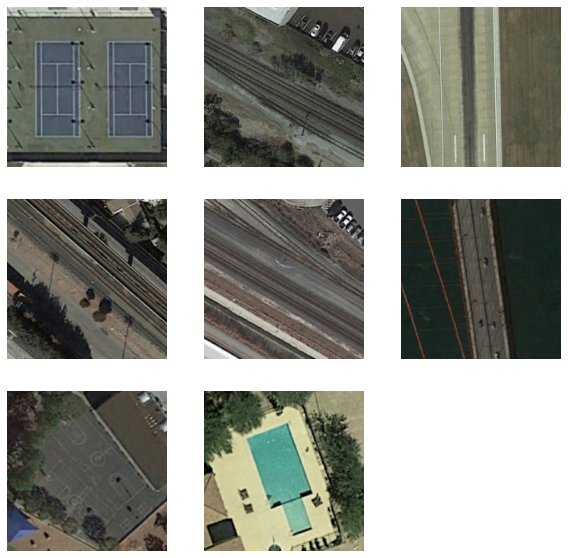

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(8):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    #plt.title(train_ds.class_names[labels[i][0].argmax()])
    plt.axis("off")

In [ ]:
train_ds.class_names

['basketball_court',
 'bridge',
 'crosswalk',
 'golf_course',
 'oil_well',
 'overpass',
 'railway',
 'runway',
 'swimming_pool',
 'tennis_court']

In [ ]:
input_shape = (img_height,img_width,3)

In [ ]:
tf.test.gpu_device_name()

'/device:GPU:0'

#Model Architecture , Training & Data Augmentation

In [14]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.2),
    #layers.CenterCrop(height = img_height, width = img_width),
    #layers.experimental.preprocessing.RandomZoom(0.2),
  ]
)

In [ ]:
def get_cnn_model(input_shape, num_classes, d = 0.2):
  model = Sequential()
  
  model.add(data_augmentation)
  model.add(layers.experimental.preprocessing.Rescaling(1./255))
  #conv
  model.add(Conv2D(16, kernel_size=3,  input_shape = input_shape)) #224
  model.add(BatchNormalization())
  model.add(LeakyReLU(alpha=0.05))
  model.add(MaxPooling2D(pool_size=(2, 2),strides=2, padding='same'))
  model.add(Dropout(d))
  
  #conv
  model.add(Conv2D(32, kernel_size=3)) #112
  model.add(BatchNormalization())
  model.add(LeakyReLU(alpha=0.05))
  model.add(MaxPooling2D(pool_size=(2, 2),strides=2, padding='same'))
  model.add(Dropout(d))

  
  model.add(Conv2D(64, kernel_size=3)) #56
  model.add(BatchNormalization())
  model.add(LeakyReLU(alpha=0.05))
  model.add(MaxPooling2D(pool_size=(2, 2),strides=2, padding='same'))
  model.add(Dropout(d))
  
  #conv
  model.add(Conv2D(128, kernel_size=3,strides = 2, padding = 'same')) #28
  model.add(BatchNormalization())
  model.add(LeakyReLU(alpha=0.05))
  model.add(MaxPooling2D(pool_size=(2, 2),strides=2, padding='same'))
  model.add(Dropout(d))
  
  #conv
  model.add(Conv2D(256, kernel_size=3, padding = 'same')) #14
  model.add(BatchNormalization())
  model.add(LeakyReLU(alpha=0.05))
  model.add(MaxPooling2D(pool_size=(2, 2),strides=2, padding='same'))
  #model.add(Dropout(d))


  model.add(Flatten())
  #2 x FC
  model.add(Dense(256,activity_regularizer=keras.regularizers.L1(0.01)))
  #model.add(BatchNormalization())
  model.add(LeakyReLU(alpha=0.05))
  model.add(Dropout(0.2))
  model.add(Dense(128))
  #model.add(BatchNormalization())
  model.add(LeakyReLU(alpha=0.05))
  model.add(Dropout(0.2))
  model.add(Dense(num_classes, activation='softmax'))


  
  return model


In [ ]:
model = get_cnn_model(input_shape, num_classes) 
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])
history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=80, 
                    verbose = 1)

Epoch 1/80
54/54 [==============================] - 4s 46ms/step - loss: 6.9667 - accuracy: 0.1741 - val_loss: 4.5979 - val_accuracy: 0.0400
Epoch 2/80
54/54 [==============================] - 2s 41ms/step - loss: 5.2011 - accuracy: 0.2706 - val_loss: 4.0800 - val_accuracy: 0.1200
Epoch 3/80
54/54 [==============================] - 2s 40ms/step - loss: 4.3209 - accuracy: 0.3765 - val_loss: 4.1663 - val_accuracy: 0.1200
Epoch 4/80
54/54 [==============================] - 2s 41ms/step - loss: 3.5702 - accuracy: 0.4824 - val_loss: 4.4279 - val_accuracy: 0.0800
Epoch 5/80
54/54 [==============================] - 2s 40ms/step - loss: 3.6449 - accuracy: 0.4965 - val_loss: 3.8722 - val_accuracy: 0.1067
Epoch 6/80
54/54 [==============================] - 2s 40ms/step - loss: 3.6214 - accuracy: 0.5035 - val_loss: 3.2243 - val_accuracy: 0.1333
Epoch 7/80
54/54 [==============================] - 2s 41ms/step - loss: 3.1933 - accuracy: 0.5200 - val_loss: 3.5438 - val_accuracy: 0.3333
Epoch 8/80
54

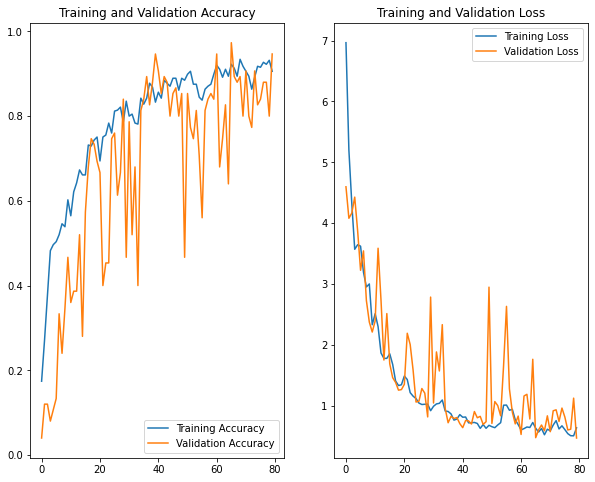

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(80)

plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
test_dir = '/content/drive/MyDrive/GNR 638/test'

#Predicting on Test set

In [ ]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_dir,
  labels=None,
  label_mode=None,
  shuffle=False,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 100 files belonging to 1 classes.


In [ ]:
predictions = model.predict(test_ds)
preds = []
for p in tf.nn.softmax(predictions).numpy():
  preds.append(p.argmax()+1)

preds = np.asarray(preds) 

In [ ]:
img_id = []
for i in range(101,201):
  img_id.append(i)
img_id = np.asarray(img_id)

In [ ]:
df = pd.DataFrame(columns = ['ImageID', 'LabelID'])
df['ImageID'] = img_id
df['LabelID'] = preds
df.to_csv('final_preds2.csv')

In [ ]:
df.head()

,ImageID,LabelID
0,101,5
1,102,8
2,103,3
3,104,5
4,105,2


In [ ]:
df.shape

(100, 3)

In [ ]:
model.save('/content/drive/MyDrive/GNR 638/83')
model.save_weights('/content/drive/MyDrive/GNR 638/83')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/GNR 638/83/assets


In [15]:
saved_model = keras.models.load_model('/content/drive/MyDrive/GNR 638/83')

In [16]:
saved_model.summary()

Model: "sequential_69"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_68 (Sequential)   (None, 224, 224, 3)       0         
_________________________________________________________________
rescaling_34 (Rescaling)     (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_166 (Conv2D)          (None, 222, 222, 16)      448       
_________________________________________________________________
batch_normalization_166 (Bat (None, 222, 222, 16)      64        
_________________________________________________________________
leaky_re_lu_220 (LeakyReLU)  (None, 222, 222, 16)      0         
_________________________________________________________________
max_pooling2d_155 (MaxPoolin (None, 111, 111, 16)      0         
_________________________________________________________________
dropout_194 (Dropout)        (None, 111, 111, 16)    